# Geospatial Data Science - EEPS 440/460

# Lecture 11

# Map Projections II

---
# Class Readings:

[*GDAL: The Open Source Technology Behind Google Maps*](https://thenewstack.io/gdal-the-open-source-technology-behind-google-maps/)

[*A Gentle Introduction to GDAL*](https://medium.com/planet-stories/a-gentle-introduction-to-gdal-part-1-a3253eb96082)

---

# PROJ

PROJ is a generic coordinate transformation software that transforms geospatial coordinates from one coordinate reference system (CRS) to another. This includes cartographic projections as well as geodetic transformations.

Source: https://proj.org/

In [30]:
%%html
<iframe width="939" height="528" src="https://en.wikibooks.org/wiki/PROJ.4" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

# EPSG Geodetic Parameter Registry

The EPSG Geodetic Parameter Dataset is a database of of global, regional, national, or local map projections. It helps us avoid defining all the parameters of a map projection.

In [31]:
%%html
<iframe width="939" height="528" src="https://spatialreference.org/ref/epsg/" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Let's look at some examples of projections and their EPSG and PROJ codes

#### Regular lat/lon grid (Plate Carree)
* EPSG:4326
* +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs 

#### CONUS Albers equal area
* EPSG:5070
* +proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=23 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 

# We are now ready for GDAL

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/GDALLogoColor.svg/2000px-GDALLogoColor.svg.png" width="500">

### GDAL stands for Geospatial Data Abstraction Library

GDAL is a C++ translator library for more than 200 raster and vector geospatial data formats. It is released under an X/MIT style Open Source license by the Open Source Geospatial Foundation. As a library, it presents a single raster abstract data model and single vector abstract data model to the calling application for all supported formats. It also comes with a variety of useful command line utilities for data translation and processing. It offers an API for a variety of languages such as C, C++, Python, Perl, C# and Java.

Source: https://www.osgeo.org/projects/gdal

Its core features include: 
    
* Reading and writing of raster and vector geospatial formats
* Data format translation
* Geospatial processing: subsetting, image warping, reprojection, mosaicing, tiling, DEM processing
* If all that you are using a GIS software package is for changing file formats, subsetting data, changing the spatial resolution, or reprojecting data, GDAL will let you accomplish all those tasks in a fraction of the time (and on any computing platform!)

# Which raster formats does GDAL support?

In [32]:
%%html
<iframe width="939" height="528" src="https://gdal.org/drivers/raster/index.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# What other software relies on GDAL?

In [33]:
%%html
<iframe width="939" height="528" src="https://gdal.org/software_using_gdal.html#software-using-gdal" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## What about rasterio?

It is just a wrapper around Python's GDAL library that makes interacting with raster data more straightforward and "Pythonic".

# So let's get started...

* The real power of GDAL is in the C++ library. However, we are going to be using primarily the command line (i.e., terminal) tools. 

* GDAL integrates the PROJ software library, making map projections straightforward from GDAL itself.

* Remember that we can access the terminal (via Bash) from another tab in Jupyter Lab or we can just include Bash code within our Jupyter notebook

* To ensure everyone can reproduce this lecture (and for your assignments) we will be using the Jupyter Notebook approach. 

# GDAL command line tools

In [34]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/index.html#raster-programs" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Let's explore gdal command line tools using the data from HW#1

In [35]:
%matplotlib inline
import rasterio
import matplotlib.pyplot as plt
file = '../data/NED/dem_lat3536_lon-80-79.tif'

In [36]:
#Let's create a function that reads in the file and creates a map
import numpy as np
def create_figure(file):
    #Define a file pointer
    fp = rasterio.open(file)
    #Read in the data
    dem = fp.read(1)
    #Create the figure
    fig = plt.figure(figsize=(10,10))
    #ax = plt.axes(projection=crs)
    #Mask out the nodata value
    dem = np.ma.masked_array(dem,dem==fp.nodata)
    #Note that for simplicity I am just doing a plain imshow (you could use Carto)
    plt.imshow(dem,cmap=plt.get_cmap('terrain'))
    #Now lets add a colorbar
    cb = plt.colorbar(orientation='horizontal',shrink=0.75,pad=0.03)
    cb.ax.tick_params(labelsize=20)
    #Remove ticks
    plt.xticks([])
    plt.yticks([])
    #And a title
    plt.title('Elevation (m)',fontsize=25)
    #Close the file pointer
    fp.close()
    #Show the plot
    plt.show()

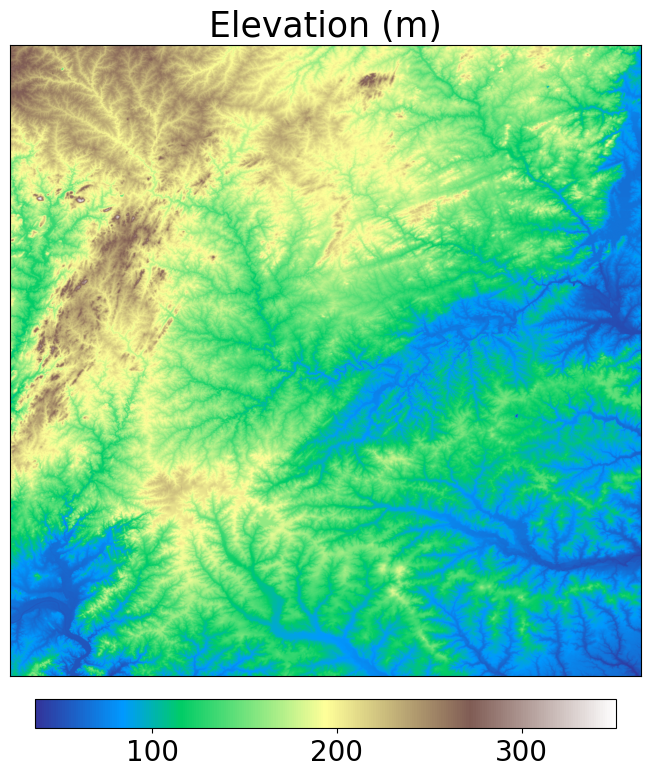

In [37]:
create_figure(file)

# gdalinfo

Purpose: Learning about our data

In [38]:
%%bash
gdalinfo ../data/NED/dem_lat3536_lon-80-79.tif

Driver: GTiff/GeoTIFF
Files: ../data/NED/dem_lat3536_lon-80-79.tif
Size is 3600, 3600
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        MEMBER["World Geodetic System 1984 (G2296)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
       

# gdalinfo

In [39]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/gdalinfo.html#gdalinfo" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# More complex gdalinfo call

In [40]:
%%bash
gdalinfo -stats -proj4 ../data/NED/dem_lat3536_lon-80-79.tif # -stats will include dataset basic statistics in the end
#Let's remove the auxiliary file that was created
rm ../data/NED/dem_lat3536_lon-80-79.tif.aux.xml

Driver: GTiff/GeoTIFF
Files: ../data/NED/dem_lat3536_lon-80-79.tif
Size is 3600, 3600
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        MEMBER["World Geodetic System 1984 (G2296)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
       

# gdal_translate

Purpose: Convert between raster formats:

gdal_translate -of target_format input output

In [68]:
%%bash
gdal_translate -of AAIGrid ../data/NED/dem_lat3536_lon-80-79.tif ../Workspace/test.arcascii

Input file size is 3600, 3600
0...10...20...30...40...50...60...70...80...90...100 - done.


Lets convert ascii to zarr?

In [73]:
%%bash 
# remove potential existing files
rm -rf ../Workspace/test.zarr 

In [75]:
%%bash
# now lets translate the data
gdal_translate -of Zarr ../Workspace/test.arcascii ../Workspace/test.zarr 

Input file size is 3600, 3600
0...10...20...30...40...50...60...70...80...90...100 - done.


In [76]:
%%bash
#Use gdalinfo to see what it created
gdalinfo ../Workspace/test.zarr

Driver: Zarr/Zarr
Files: ../Workspace/test.zarr/test/.zarray
       ../Workspace/test.zarr
Size is 3600, 3600
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ID["EPSG",6326]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["Degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["longitude",east,
            ORDER[1],
            ANGLEUNIT["Degree",0.0174532925199433]],
        AXIS["latitude",north,
            ORDER[2],
            ANGLEUNIT["Degree",0.0174532925199433]]]
Data axis to CRS axis mapping: 1,2
Origin = (-80.000000000000000,36.000000000800000)
Pixel Size = (0.000277777778000,-0.000277777778000)
Metadata:
  AREA_OR_POINT=Area
Corner Coordinates:
Upper Left  ( -80.0000000,  36.0000000) ( 80d 0' 0.00"W, 36d 0' 0.00"N)
Lower Left  ( -80.0000000,  35.0000000) ( 80d 0' 0.00"W, 35d 0' 0.00"N)
Upper Right ( -79.0000000,  36.0000000) ( 79d 0' 0.00"W,

# gdal_translate

In [77]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/gdal_translate.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# gdalwarp

Purpose: Image reprojection and warping utility

## Example 1: Change spatial resolution

In [78]:
%%bash 
gdalwarp -r average -overwrite -tr 0.1 0.1 ../data/NED/dem_lat3536_lon-80-79.tif ../Workspace/test.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/test.tif

Creating output file that is 10P x 10L.
Using internal nodata values (e.g. -99999) for image ../data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source ../data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/test.tif.
Processing ../data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/test.tif
Size is 10, 10
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        MEMBER["World Geodetic System 1984 (G2296)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,


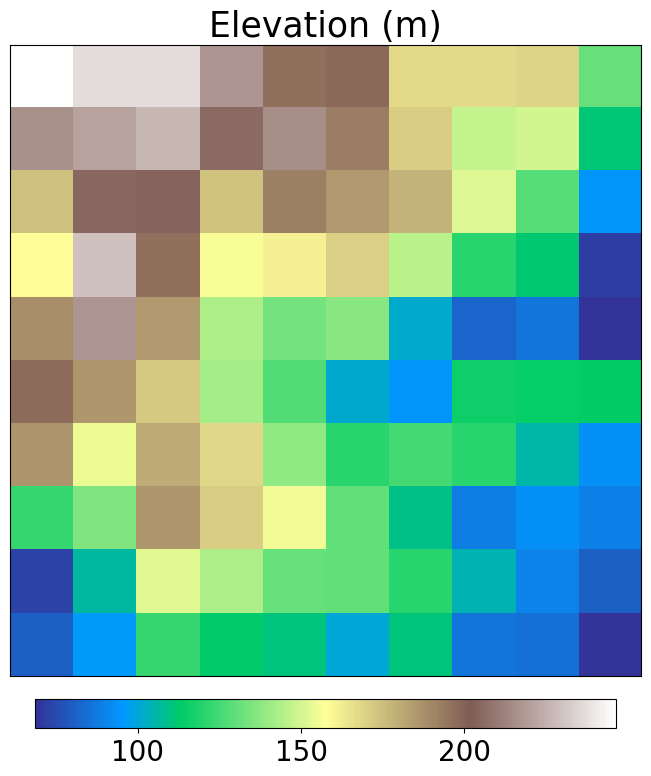

In [79]:
file = '../Workspace/test.tif'
#Create the figure
create_figure(file)

## Example 2: Subset the data

In [80]:
%%bash 
gdalwarp -overwrite -te -79.65 35.25 -79.35 35.55 ../data/NED/dem_lat3536_lon-80-79.tif ../Workspace/test.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/test.tif

Creating output file that is 1080P x 1080L.
Using internal nodata values (e.g. -99999) for image ../data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source ../data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/test.tif.
Processing ../data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/test.tif
Size is 1080, 1080
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        MEMBER["World Geodetic System 1984 (G2296)"],
        ELLIPSOID["WGS 84",6378137,298.257

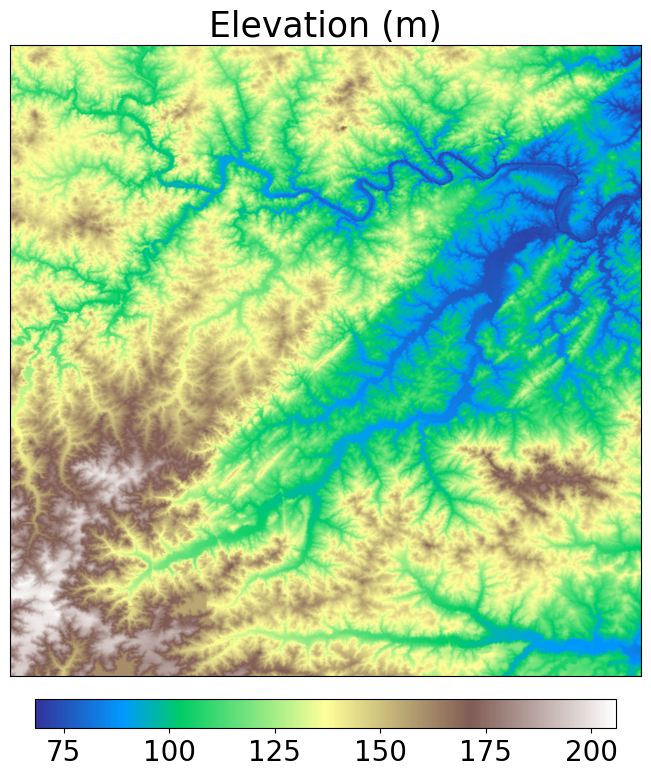

In [81]:
file = '../Workspace/test.tif'
#Create the figure
create_figure(file)

## Example 3: Reproject to Global Mollweide

In [82]:
%%bash 
#Mollweide projection
gdalwarp -r average -tr 30 30 -overwrite -t_srs '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' ../data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 4756P x 3812L.
Using internal nodata values (e.g. -99999) for image ../data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source ../data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/example.tif.
Processing ../data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 4756, 3812
Coordinate System is:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6326]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["Degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Mollweide"],
        PARAMETER["Longitude of natural origin",0,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["False easting",0,
            LEN

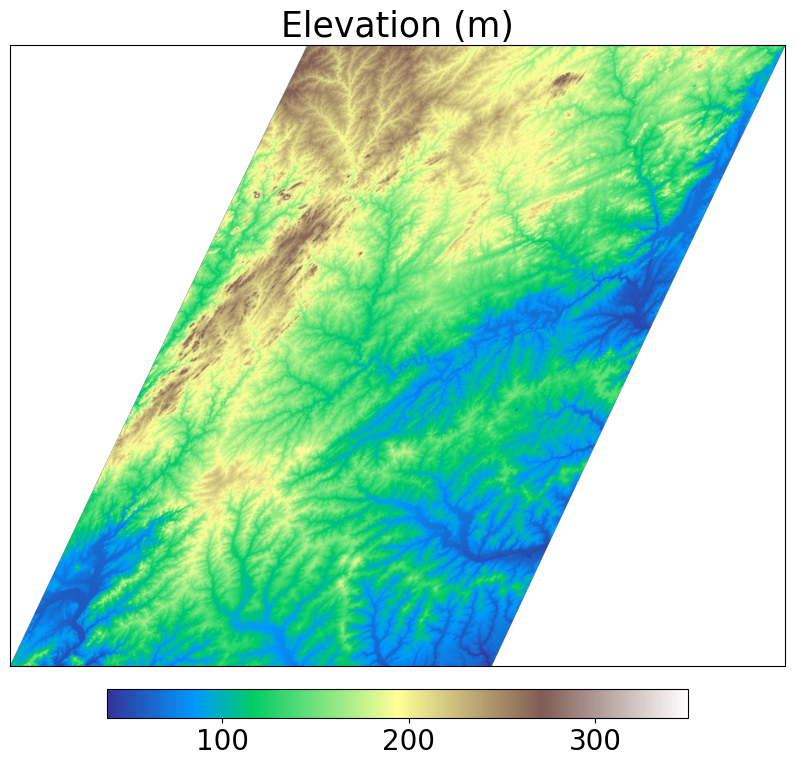

In [83]:
#Let's read that data back in to Python and make the plot we made before
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

And that is what a map projection distortion looks like! 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Mollweide_with_Tissot%27s_Indicatrices_of_Distortion.svg/2560px-Mollweide_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">


## Example 4: Reproject to local Mollweide

In [84]:
%%bash 
#Mollweide projection
gdalwarp -r average -overwrite -t_srs '+proj=moll +lon_0=-79.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs' ../data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 3122P x 4031L.
Using internal nodata values (e.g. -99999) for image ../data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source ../data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/example.tif.
Processing ../data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 3122, 4031
Coordinate System is:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6326]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["Degree",0.0174532925199433]]],
    CONVERSION["unnamed",
        METHOD["Mollweide"],
        PARAMETER["Longitude of natural origin",-79.5,
            ANGLEUNIT["Degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["False easting",0,
           

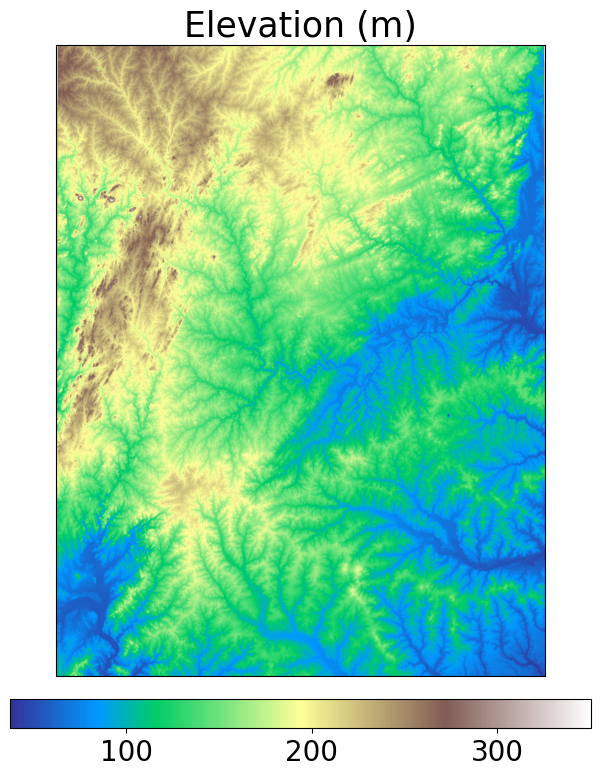

In [85]:
#Let's read that data back in to Python and make the plot we made before
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

Localized projection? Distortion is minimized!

## Example 5: Reproject to a generalized albers conic equal area

In [86]:
%%bash 
#Localized albers conic equal area
gdalwarp -r average -overwrite -t_srs '+proj=aea +lat_1=20 +lat_2=50 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=NAD83' ../data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 5034P x 5056L.
Using internal nodata values (e.g. -99999) for image ../data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source ../data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/example.tif.
Processing ../data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 5034, 5056
Coordinate System is:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101004,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6269]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]],
    CONVERSION["Albers Equal Area",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
 

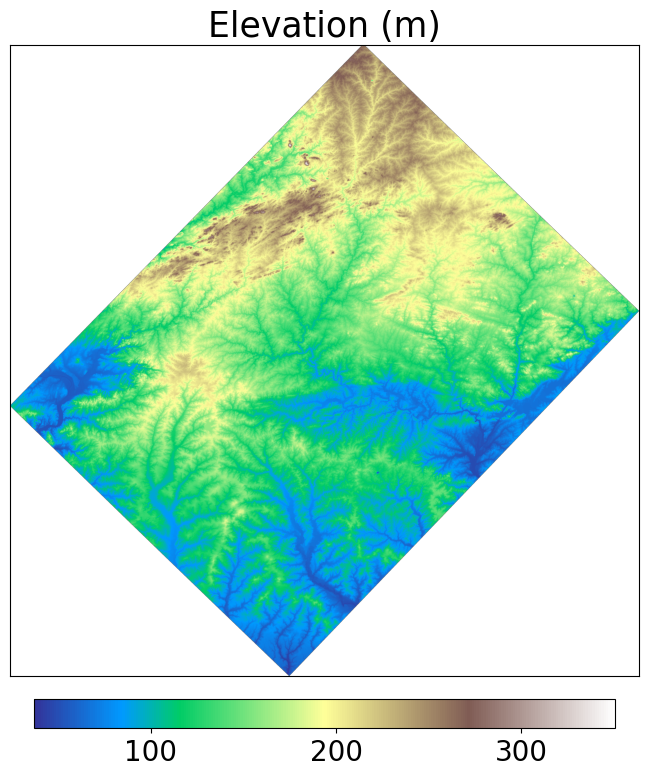

In [87]:
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Albers_with_Tissot%27s_Indicatrices_of_Distortion.svg/2880px-Albers_with_Tissot%27s_Indicatrices_of_Distortion.svg.png" width="700">


## Example 6: Reproject to a localized albers conic equal area

In [88]:
%%bash 
#Localized albers conic equal area
gdalwarp -r average -overwrite -t_srs '+proj=aea +lat_1=35 +lat_2=36 +lat_0=35.5 +lon_0=-79.5 +x_0=0 +y_0=0 +ellps=WGS84 +datum=NAD83' ../data/NED/dem_lat3536_lon-80-79.tif ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 3243P x 3945L.
Using internal nodata values (e.g. -99999) for image ../data/NED/dem_lat3536_lon-80-79.tif.
Copying nodata values from source ../data/NED/dem_lat3536_lon-80-79.tif to destination ../Workspace/example.tif.
Processing ../data/NED/dem_lat3536_lon-80-79.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 3243, 3945
Coordinate System is:
PROJCRS["unknown",
    BASEGEOGCRS["unknown",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101004,
                LENGTHUNIT["metre",1]],
            ID["EPSG",6269]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]],
    CONVERSION["Albers Equal Area",
        METHOD["Albers Equal Area",
            ID["EPSG",9822]],
        PARAMETER["Latitude of false origin",35.5,
            ANGLEUNIT["degree",0.0174532925199433]

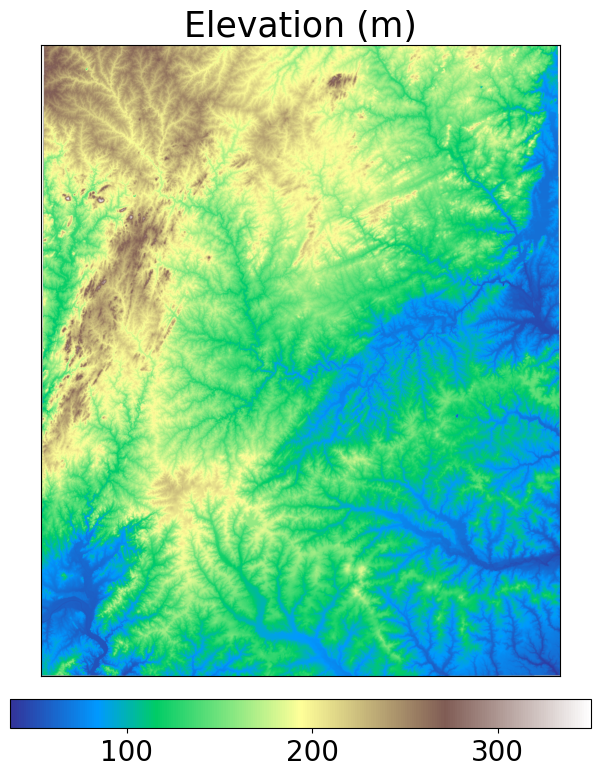

In [89]:
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

# What can we actually do in gdalwarp?

In [90]:
%%html
<iframe width="939" height="528" src="https://gdal.org/programs/gdalwarp.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### But how do we work with very large datasets that are split into tiles?

Let's look at the example of the US National Elevation Dataset (NED) at 1 arcsec resolution. 

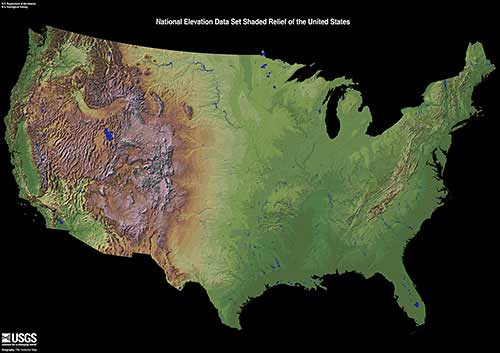

This is actually the same database that you used in HW1 to parse files

In [91]:
%%bash 
#Move to the directory
cd ../data/NED
#List all the files
ls
#Count the number of files
ls -la | wc -l
#Determine the size of the folder
du -h ../NED


NED.vrt
dem_lat1819_lon-100-99.tif
dem_lat1819_lon-101-100.tif
dem_lat1819_lon-102-101.tif
dem_lat1819_lon-103-102.tif
dem_lat1819_lon-104-103.tif
dem_lat1819_lon-105-104.tif
dem_lat1819_lon-106-105.tif
dem_lat1819_lon-107-106.tif
dem_lat1819_lon-108-107.tif
dem_lat1819_lon-109-108.tif
dem_lat1819_lon-110-109.tif
dem_lat1819_lon-111-110.tif
dem_lat1819_lon-112-111.tif
dem_lat1819_lon-113-112.tif
dem_lat1819_lon-114-113.tif
dem_lat1819_lon-115-114.tif
dem_lat1819_lon-116-115.tif
dem_lat1819_lon-117-116.tif
dem_lat1819_lon-118-117.tif
dem_lat1819_lon-119-118.tif
dem_lat1819_lon-120-119.tif
dem_lat1819_lon-121-120.tif
dem_lat1819_lon-122-121.tif
dem_lat1819_lon-123-122.tif
dem_lat1819_lon-124-123.tif
dem_lat1819_lon-125-124.tif
dem_lat1819_lon-126-125.tif
dem_lat1819_lon-127-126.tif
dem_lat1819_lon-128-127.tif
dem_lat1819_lon-129-128.tif
dem_lat1819_lon-130-129.tif
dem_lat1819_lon-61-60.tif
dem_lat1819_lon-62-61.tif
dem_lat1819_lon-63-62.tif
dem_lat1819_lon-64-63.tif
dem_lat1819_lon-65-64

Let's say that I want to extract all the elevation data from NED at a 10 arcsec spatial resolution over a bounding box that encompasses the Appalachian mountains. What would you do?

# Virtual rasters

In [92]:
%%html
<iframe width="939" height="528" src="https://gdal.org/drivers/raster/vrt.html" frameborder="0" allow="accelerometer;  autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Long story short, it is a text file that glues all the single tiles files together to make one "virtual" raster file.

I have already created a virtual raster for NED so let's use `gdalinfo` on it

In [93]:
%%bash
gdalinfo ../data/NED/NED.vrt

Driver: VRT/Virtual Raster
Files: ../data/NED/NED.vrt
       ../data/NED/dem_lat1819_lon-100-99.tif
       ../data/NED/dem_lat1819_lon-101-100.tif
       ../data/NED/dem_lat1819_lon-102-101.tif
       ../data/NED/dem_lat1819_lon-103-102.tif
       ../data/NED/dem_lat1819_lon-104-103.tif
       ../data/NED/dem_lat1819_lon-105-104.tif
       ../data/NED/dem_lat1819_lon-106-105.tif
       ../data/NED/dem_lat1819_lon-107-106.tif
       ../data/NED/dem_lat1819_lon-108-107.tif
       ../data/NED/dem_lat1819_lon-109-108.tif
       ../data/NED/dem_lat1819_lon-110-109.tif
       ../data/NED/dem_lat1819_lon-111-110.tif
       ../data/NED/dem_lat1819_lon-112-111.tif
       ../data/NED/dem_lat1819_lon-113-112.tif
       ../data/NED/dem_lat1819_lon-114-113.tif
       ../data/NED/dem_lat1819_lon-115-114.tif
       ../data/NED/dem_lat1819_lon-116-115.tif
       ../data/NED/dem_lat1819_lon-117-116.tif
       ../data/NED/dem_lat1819_lon-118-117.tif
       ../data/NED/dem_lat1819_lon-119-118.tif
       

In other words, it is a file that allows us to interpret all the tiled files as a single one.

# Working with virtual rasters

Let's try our example of extracting elevation data over the Appalachian mountains in NC at a 1 arcsec (i.e., 0.00277777777 arcdegree) spatial resolution.

In [94]:
%%bash 
#Extract the desired region (-te), define a new resolution (-tr), 
#define the resampling method (-r), and overwrite an exiting file (-overwrite)
gdalwarp -te -85 34 -80 37 -tr 0.00277777777 0.00277777777 -r near -overwrite ../data/NED/NED.vrt ../Workspace/example.tif
#Use gdalinfo to see what it created
gdalinfo ../Workspace/example.tif

Creating output file that is 1800P x 1080L.
Using internal nodata values (e.g. -99999) for image ../data/NED/NED.vrt.
Copying nodata values from source ../data/NED/NED.vrt to destination ../Workspace/example.tif.
Processing ../data/NED/NED.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Driver: GTiff/GeoTIFF
Files: ../Workspace/example.tif
Size is 1800, 1080
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        MEMBER["World Geodetic System 1984 (G2296)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
    

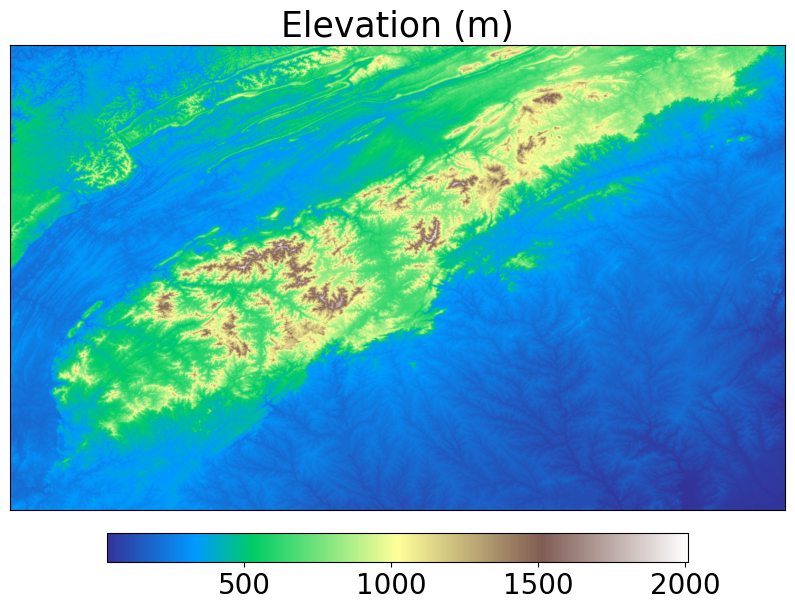

In [95]:
#Let's read that file in and create a map
file = '../Workspace/example.tif'
#Create the figure
create_figure(file)

## Let's do some simply analysis with this data

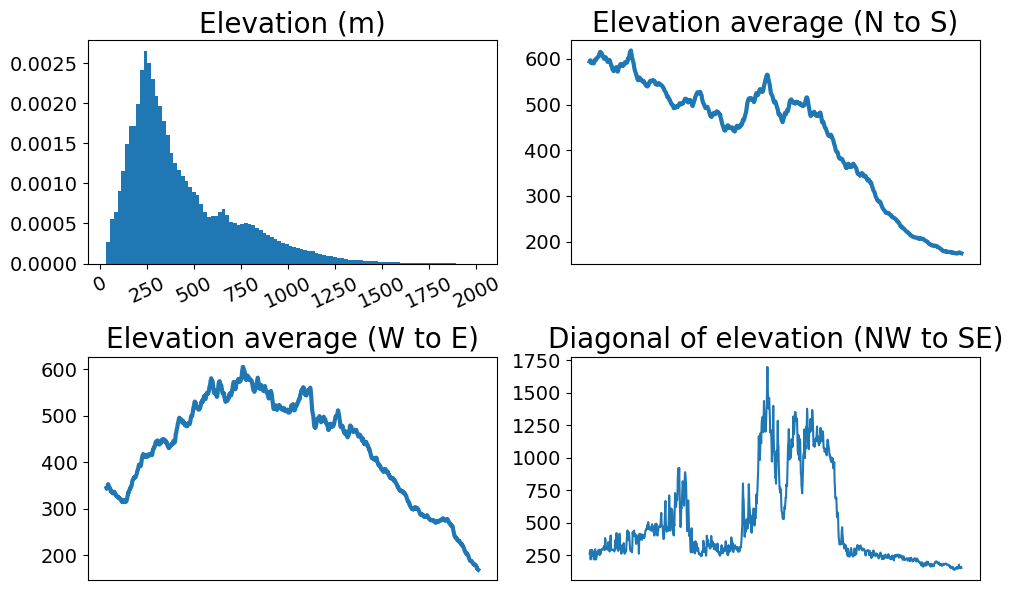

In [96]:
#Define a file pointer
fp = rasterio.open(file)
#Read in the data
dem = fp.read(1)
#Mask out the nodata value
dem = np.ma.masked_array(dem,dem==fp.nodata)
#Initialize figure
plt.figure(figsize=(10,6))
#Let's plot the histogram
plt.subplot(2,2,1)
plt.hist(dem.reshape(dem.size),density=1,bins=100)
plt.title('Elevation (m)',fontsize=20)
plt.xticks(fontsize=14,rotation=25)
plt.yticks(fontsize=14)
#Let's plot the elevation average from north to south
plt.subplot(2,2,2)
plt.title('Elevation average (N to S)',fontsize=20)
plt.plot(np.mean(dem,axis=1),lw=3)
plt.yticks(fontsize=14)
plt.xticks([])
#Let's plot the elevation average from west to east
plt.subplot(2,2,3)
plt.title('Elevation average (W to E)',fontsize=20)
plt.plot(np.mean(dem,axis=0),lw=3)
plt.yticks(fontsize=14)
plt.xticks([])
#Let's plot the diagonal of the data
plt.subplot(2,2,4)
plt.title('Diagonal of elevation (NW to SE)',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks([])
plt.plot(np.diag(dem))
#Close the file pointer
fp.close()
plt.tight_layout()
#Show the plot
plt.show()

* We just created a viable way to subset and work with a GB to TB dataset in a matter of minutes

* Any ideas of how we could then work with the entire dataset (while still keeping things tractable)?

* Divide and conquer - Divide a large task (analyze the US) into smaller tasks (analyze 1/100 of the US).
* Iterate per region and perform calculations
* If available use High Performance Computing (HPC) and distribute the tasks to 100 cores. 
* But never read in 240 GB into memory. First because you can't, but even if you could it would be a waste. 

# Use GDAL

* GDAL should be your go-to from now on when you need to subset, reproject, upscale, or reformat a 2D raster dataset.
* It gives you inmense flexibility
* And more importantly, it will save you hours upon hours of work. 

There is much more to learn about GDAL. Here are some resources:
* https://github.com/dwtkns/gdal-cheat-sheet
* https://medium.com/planet-stories/a-gentle-introduction-to-gdal-part-1-a3253eb96082
* https://gdal.org/

# But what about 3D+ data? 

* GDAL is actually terrible when working with a time dimension.
* Later we will cover the CDO (climate data operators) software package. 
* CDO is the go-to when working regularly gridded time-varying data. 
* Key: GDAL still wins with 2D data.